In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
#imports for qubo
!pip install dimod
import dimod
import seaborn as sns
from tqdm import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 10.6 MB/s eta 0:00:00


In [ ]:
#parameters
num_agents = 100
total_rounds = 1000
compromise_rate = 5*1e-5
penalty = 0.05
reward = 0.02
alpha = 0.1
use_countermeasures = True
countermeasure_restore_amount = 0.01


In [ ]:
#robot starts with a random trust score
robots = {}
for i in range(1, num_agents + 1):
    robot_id = f"Robot_{i}"
    initial_trust = round(random.uniform(0.5, 0.95), 2)
    robots[robot_id] = {
        'trust': initial_trust,
        'trust_history': [initial_trust],
        'compromised': False,
        'success_count': 0,
        'fail_count': 0
    }

In [ ]:
#tracks how many robots are compromised and how many tasks succeed/fail over time
compromised_counts = []
success_counts = []
fail_counts = []

In [ ]:
rng = np.random.default_rng(seed=42)

for round_num in tqdm(range(total_rounds), desc="Simulation Progress"):

    round_compromised = 0
    round_success = 0
    round_fail = 0

    for robot in robots.values():

        # Compromise persists if ever compromised
        robot['compromised'] |= (rng.random() < compromise_rate)

        if robot['compromised']:
            round_compromised += 1
            robot['fail_count'] += 1
            robot['trust'] = max(0.05, (1 - alpha) * robot['trust'] + alpha * (robot['trust'] - penalty))
        else:
            if rng.random() < robot['trust']:
                round_success += 1
                robot['success_count'] += 1
                robot['trust'] = min(0.95, (1 - alpha) * robot['trust'] + alpha * (robot['trust'] + reward))
            else:
                round_fail += 1
                robot['fail_count'] += 1
                robot['trust'] = max(0.05, (1 - alpha) * robot['trust'] + alpha * (robot['trust'] - penalty))

        # Optional defense / countermeasure
        if use_countermeasures:
            if robot['success_count'] > 5 and robot['trust'] < 0.9:
                robot['trust'] = min(0.95, robot['trust'] + countermeasure_restore_amount)

        robot['trust_history'].append(robot['trust'])

    compromised_counts.append(round_compromised)
    success_counts.append(round_success)
    fail_counts.append(round_fail)





Simulation Progress: 100%|██████████| 1000/1000 [00:00<00:00, 6850.16it/s]


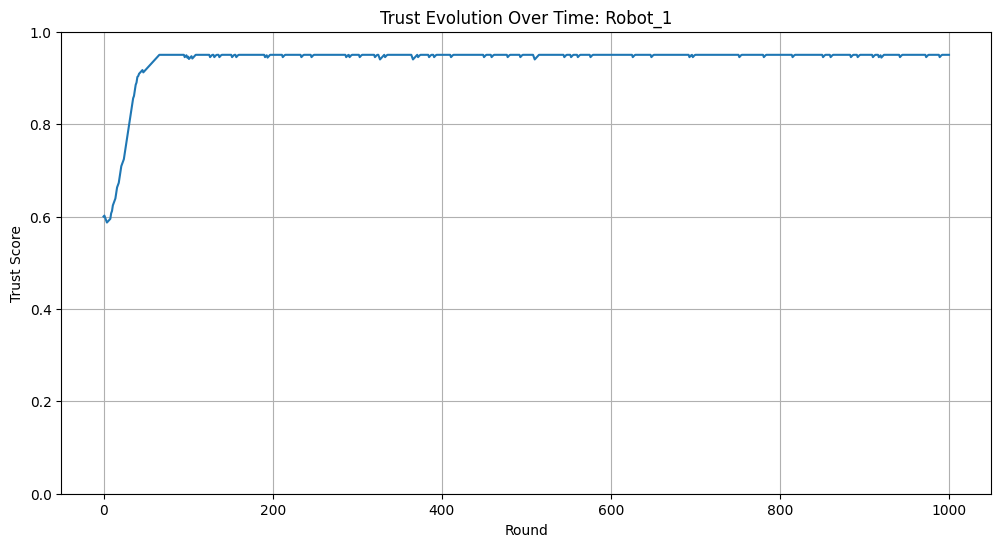

In [ ]:
#shows trust score over time for one robot
example_robot_id = "Robot_1"
plt.figure(figsize=(12,6))
plt.plot(robots[example_robot_id]['trust_history'])
plt.title(f"Trust Evolution Over Time: {example_robot_id}")
plt.xlabel("Round")
plt.ylabel("Trust Score")
plt.ylim(0, 1)
plt.grid()
plt.show()


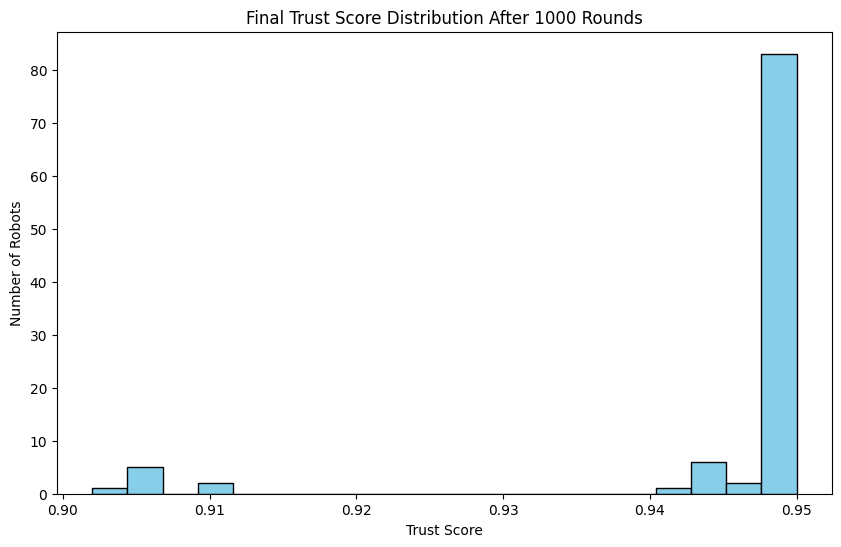

In [ ]:
#shows overall distribution of trust scores after 1k ronds
final_trust_scores = [robots[robot_id]['trust'] for robot_id in robots]
plt.figure(figsize=(10,6))
plt.hist(final_trust_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Final Trust Score Distribution After 1000 Rounds")
plt.xlabel("Trust Score")
plt.ylabel("Number of Robots")
plt.show()

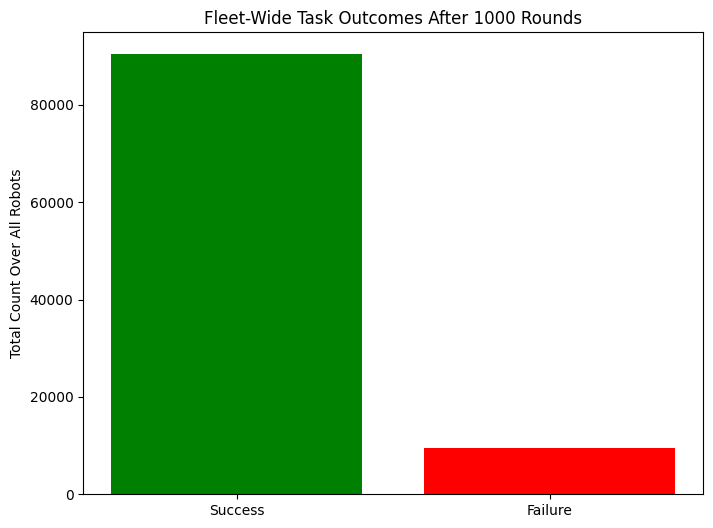

Total Successes: 90406
Total Failures: 9594


In [ ]:
#shows successful and failed tasks
total_success = sum(robots[robot_id]['success_count'] for robot_id in robots)
total_fail = sum(robots[robot_id]['fail_count'] for robot_id in robots)
plt.figure(figsize=(8,6))
plt.bar(['Success', 'Failure'], [total_success, total_fail], color=['green', 'red'])
plt.title("Fleet-Wide Task Outcomes After 1000 Rounds")
plt.ylabel("Total Count Over All Robots")
plt.show()

print(f"Total Successes: {total_success}")
print(f"Total Failures: {total_fail}")


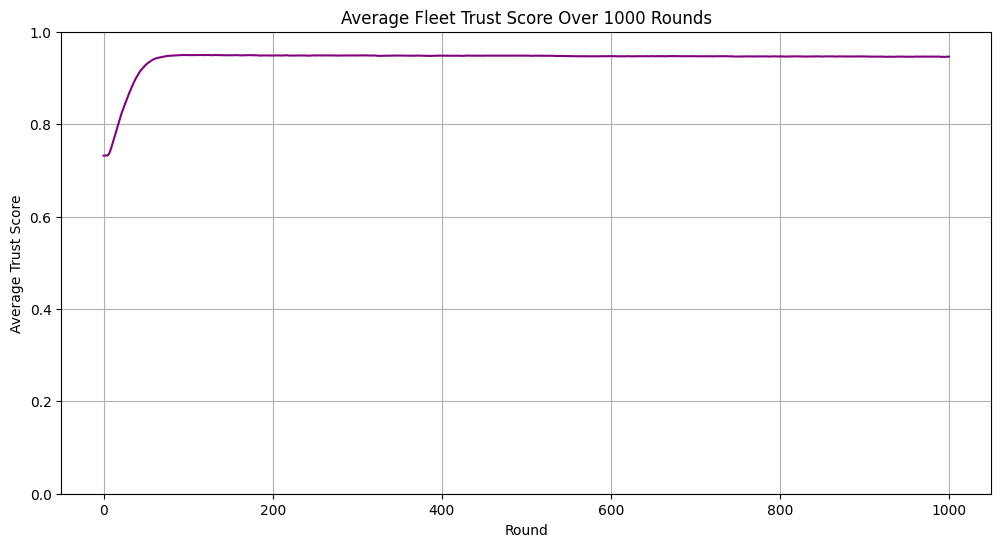

In [ ]:
#shows average trust over time
rounds = len(next(iter(robots.values()))['trust_history'])
average_trust_per_round = [
    np.mean([robots[robot_id]['trust_history'][round_idx] for robot_id in robots])
    for round_idx in range(rounds)
]
plt.figure(figsize=(12,6))
plt.plot(range(rounds), average_trust_per_round, color='purple')
plt.title("Average Fleet Trust Score Over 1000 Rounds")
plt.xlabel("Round")
plt.ylabel("Average Trust Score")
plt.ylim(0, 1)
plt.grid()
plt.show()

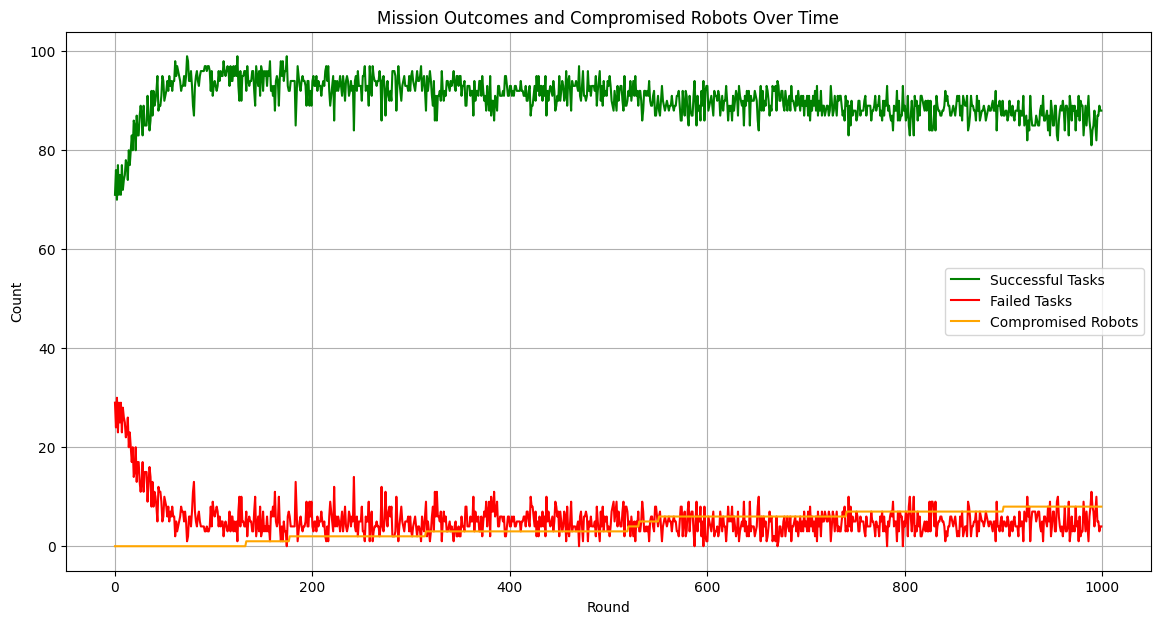

In [ ]:
#tracks successes, failures and compromises each round
plt.figure(figsize=(14,7))
plt.plot(range(total_rounds), success_counts, label='Successful Tasks', color='green')
plt.plot(range(total_rounds), fail_counts, label='Failed Tasks', color='red')
plt.plot(range(total_rounds), compromised_counts, label='Compromised Robots', color='orange')
plt.title("Mission Outcomes and Compromised Robots Over Time")
plt.xlabel("Round")
plt.ylabel("Count")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Luke's code

average_robot = {
    'trust': np.mean([0.3, 0.85]),
    'trust_history': [np.mean([0.3, 0.85])],
    'compromised': True,
    'success_count': 0,
    'fail_count': 0
}
avg_robots = {}
for i in range(1, num_agents + 1):
  avg_robots[i] = average_robot


for round_num in tqdm(range(total_rounds), desc="Simulation Progress"):

    round_compromised = 0
    round_success = 0
    round_fail = 0

    for robot in robots.values():

        # Compromise persists if ever compromised
        robot['compromised'] |= (rng.random() < compromise_rate)

        if robot['compromised']:
            round_compromised += 1
            robot['fail_count'] += 1
            robot['trust'] = max(0.05, (1 - alpha) * robot['trust'] + alpha * (robot['trust'] - penalty))
        else:
            if rng.random() < robot['trust']:
                round_success += 1
                robot['success_count'] += 1
                robot['trust'] = min(0.95, (1 - alpha) * robot['trust'] + alpha * (robot['trust'] + reward))
            else:
                round_fail += 1
                robot['fail_count'] += 1
                robot['trust'] = max(0.05, (1 - alpha) * robot['trust'] + alpha * (robot['trust'] - penalty))

        # Optional defense / countermeasure
        if use_countermeasures:
            if robot['success_count'] > 5 and robot['trust'] < 0.9:
                robot['trust'] = min(0.95, robot['trust'] + countermeasure_restore_amount)

        robot['trust_history'].append(robot['trust'])

    compromised_counts.append(round_compromised)
    success_counts.append(round_success)
    fail_counts.append(round_fail)


Simulation Progress: 100%|██████████| 1000/1000 [00:00<00:00, 6605.84it/s]


In [ ]:
trust_score_list = []
for robot in avg_robots.values():
    trust_score_list.append(robot['trust'])
np.unique(np.array(trust_score_list), return_counts = 1)

(array([0.575]), array([100]))

In [ ]:
#threshold
starting_trusts = []
final_trusts = []
success_counts_robot = []

#robots trust histories
for robot_id in robots:
    starting_trusts.append(robots[robot_id]['trust_history'][0])
    final_trusts.append(robots[robot_id]['trust_history'][-1])
    success_counts_robot.append(robots[robot_id]['success_count'])

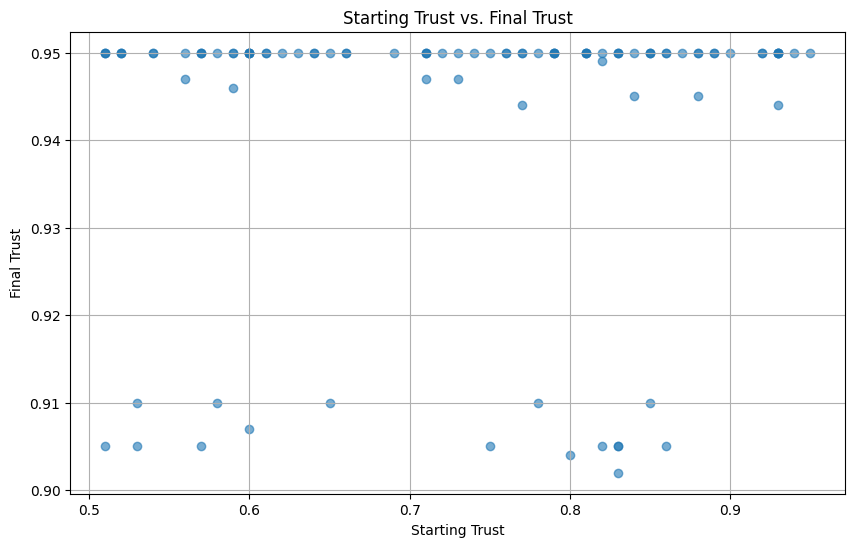

In [ ]:
#shows where robots tend to maintain or lsoe trust
plt.figure(figsize=(10,6))
plt.scatter(starting_trusts, final_trusts, alpha=0.6)
plt.title('Starting Trust vs. Final Trust')
plt.xlabel('Starting Trust')
plt.ylabel('Final Trust')
plt.grid()
plt.show()

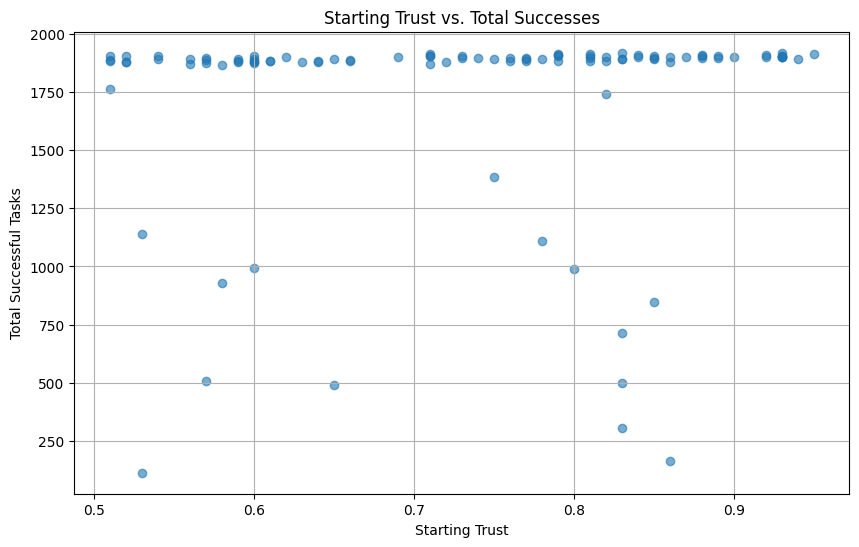

In [ ]:
#shows where robots are more likely to succeed overall
plt.figure(figsize=(10,6))
plt.scatter(starting_trusts, success_counts_robot, alpha=0.6)
plt.title('Starting Trust vs. Total Successes')
plt.xlabel('Starting Trust')
plt.ylabel('Total Successful Tasks')
plt.grid()
plt.show()

In [ ]:
#thresholds = np.linspace(0.3, 0.85, 56)
#for threshold in thresholds:
# def init_robot(threshold):
#      return {
#          'trust': threshold,
#          'trust_history': [threshold],
#          'compromised': True,
#          'success_count': 0,
#          'fail_count': 0
#      }
#
#  tresh_robots = {i: init_robot(threshold) for i in range(1, num_agents + 1)}

for round_num in range(total_rounds):

    #randomly chooses 10% of robots to compromise
    num_compromised = int(num_agents * compromise_rate)
    compromised_ids = random.sample(list(robots.keys()), num_compromised)
    #compromised_ids = random.sample(list(tresh_robots.keys()), num_compromised)

    round_compromised = 0
    round_success = 0
    round_fail = 0

    for robot_id in robots:
        robot = robots[robot_id]
        robot['compromised'] = robot_id in compromised_ids
        #checks if the robot is compromised this round
        if robot['compromised']:
          #compromised robot loses trust
            round_compromised += 1
            robot['fail_count'] += 1
            robot['trust'] = max(0.0, robot['trust'] - penalty)
        else:
          #robots try to complete tasks
            if random.random() < robot['trust']:
              #task completed it increases trust
                round_success += 1
                robot['success_count'] += 1
                robot['trust'] = min(1.0, robot['trust'] + reward)
            else:
              #failed tsks decreses trust
                round_fail += 1
                robot['fail_count'] += 1
                robot['trust'] = max(0.0, robot['trust'] - penalty)

        # defense measures -----------------------
        if use_countermeasures:
            #recover if robot has success
            if robot['success_count'] > 5 and robot['trust'] < 0.9:
                robot['trust'] += 0.01

            #trust floor
            if round_num % 200 == 0:
                robot['trust'] = max(robot['trust'], 0.2)

        #logs the round's trust score
        robot['trust_history'].append(robot['trust'])

    #records the rounds stats
    compromised_counts.append(round_compromised)
    success_counts.append(round_success)
    fail_counts.append(round_fail)

print(f"{total_rounds} simulation rounds done")

#  trust_score_list = []
#  for robot in tresh_robots.values():
#      trust_score_list.append(robot['trust'])
#  print(f"Threshold: {threshold:.2f} Trust counts: {np.unique(np.array(trust_score_list), return_counts = 1)}")

1000 simulation rounds done


In [ ]:
#used neal -------------
#finding a good solution
def solve_qubo_neal(qubo):
  #convert qubo to binaryquadraticmodel
    bqm = dimod.BinaryQuadraticModel.from_qubo(qubo)
    sampler = dimod.SimulatedAnnealingSampler()
    sampleset = sampler.sample(bqm, num_reads=100)
    #return best solution
    best_sample = sampleset.first.sample
    return best_sample

In [ ]:
#converts flat binary soultion into agent-task assignment matrix
def decode_solution(best_sample, num_agents, num_tasks):
    assignment = np.zeros((num_agents, num_tasks), dtype=int)
    for i in range(num_agents):
        for j in range(num_tasks):
            idx = i * num_tasks + j
            assignment[i, j] = best_sample[idx]
    return assignment

In [ ]:
#qubo matrix for assignment problem
def build_qubo_improved(trust_matrix, lambda_penalty=50.0, encouragement=0.5, static_mask=None):
    num_agents, num_tasks = trust_matrix.shape
    N = num_agents * num_tasks
    qubo = np.zeros((N, N))

    #encourage high trust assignments (subtracting trust and encouragement)
    for i in range(num_agents):
        for j in range(num_tasks):
            idx = i * num_tasks + j

            #encouragement proportional to trust --------------------------
            qubo[idx, idx] = -trust_matrix[i, j] - encouragement * trust_matrix[i, j]

    #hard contraints, one task per agent -----------------
    #penalize multiple task assignments for the same agent
    for i in range(num_agents):
        for j1 in range(num_tasks):
            for j2 in range(num_tasks):
                idx1 = i * num_tasks + j1
                idx2 = i * num_tasks + j2
                if idx1 == idx2:
                    qubo[idx1, idx1] += lambda_penalty * (-2)
                else:
                    qubo[idx1, idx2] += lambda_penalty * 2

    #hard constraints, one agent per task -------------------
    #penalize mutiple agents being assigned to the same task
    for j in range(num_tasks):
        for i1 in range(num_agents):
            for i2 in range(num_agents):
                idx1 = i1 * num_tasks + j
                idx2 = i2 * num_tasks + j
                if idx1 == idx2:
                    qubo[idx1, idx1] += lambda_penalty * (-2)
                else:
                    qubo[idx1, idx2] += lambda_penalty * 2

    #block assignments
    if static_mask is not None:
        for i in range(num_agents):
            for j in range(num_tasks):
                if static_mask[i][j] == 0:
                    idx = i * num_tasks + j
                    #large penalty to block
                    qubo[idx, idx] += 1000 * lambda_penalty

    return qubo

In [ ]:
#robot's trust score multipled by task difficulty
agent_trust_vector = np.array([robots[robot_id]['trust'] for robot_id in robots])
num_tasks = 100

#difficulty for each task (random values)
task_difficulty_vector = np.random.uniform(0.8, 1.0, size=num_tasks)

#100x100 agent-task trust matrix
trust_matrix_full = np.outer(agent_trust_vector, task_difficulty_vector)

#submatrix for qubo
num_agents_qubo = 5
num_tasks_qubo = 5

#trust scores for all agents
agent_trust_scores = np.array([robots[robot_id]['trust'] for robot_id in robots])

#bin agents by thier trust levels
low_trust = [i for i, t in enumerate(agent_trust_scores) if t < 0.4]
medlow_trust = [i for i, t in enumerate(agent_trust_scores) if 0.4 <= t < 0.6]
medhigh_trust = [i for i, t in enumerate(agent_trust_scores) if 0.6 <= t < 0.8]
high_trust = [i for i, t in enumerate(agent_trust_scores) if t >= 0.8]

#makes sure there is trust distribution
sampled_indices = []
if len(low_trust) > 0:
    sampled_indices += random.sample(low_trust, min(1, len(low_trust)))
if len(medlow_trust) > 0:
    sampled_indices += random.sample(medlow_trust, min(1, len(medlow_trust)))
if len(medhigh_trust) > 0:
    sampled_indices += random.sample(medhigh_trust, min(1, len(medhigh_trust)))
if len(high_trust) > 0:
    sampled_indices += random.sample(high_trust, min(1, len(high_trust)))

#fill remainder slots
remaining_needed = 5 - len(sampled_indices)
if remaining_needed > 0:
    all_indices = list(range(num_agents))
    remaining_pool = [i for i in all_indices if i not in sampled_indices]
    sampled_indices += random.sample(remaining_pool, remaining_needed)

#selected for submatrix
agents_indices = sampled_indices
#randomly select 5 task
tasks_indices = np.random.choice(range(num_tasks), num_tasks_qubo, replace=False)

#extracts the submatrix
trust_matrix_qubo = trust_matrix_full[np.ix_(agents_indices, tasks_indices)]

#baseline
print("Baseline Trust Matrix")
print(trust_matrix_qubo)

print("\n")

#poisoning attack by lowering trust scores for one agent
poisoned_trust_matrix_qubo = trust_matrix_qubo.copy()

#reduce trust for all
attack_noise = np.random.uniform(0.3, 0.5, size=poisoned_trust_matrix_qubo.shape)
poisoned_trust_matrix_qubo -= attack_noise
print("Poisoned Trust Matrix")
print(poisoned_trust_matrix_qubo)

print("\n")

#defense by partially restoring low trust scores
defense_trust_matrix_qubo = poisoned_trust_matrix_qubo.copy()
for i in range(num_agents_qubo):
    for j in range(num_tasks_qubo):
        if defense_trust_matrix_qubo[i, j] < 0.6:
            defense_trust_matrix_qubo[i, j] += 0.2
defense_trust_matrix_qubo = np.clip(defense_trust_matrix_qubo, 0, 1)
print("Defended Trust Matrix")
print(defense_trust_matrix_qubo)

Baseline Trust Matrix
[[0.8430275  0.82370876 0.84497713 0.89500856 0.89249709]
 [0.8430275  0.82370876 0.84497713 0.89500856 0.89249709]
 [0.8430275  0.82370876 0.84497713 0.89500856 0.89249709]
 [0.8430275  0.82370876 0.84497713 0.89500856 0.89249709]
 [0.8430275  0.82370876 0.84497713 0.89500856 0.89249709]]


Poisoned Trust Matrix
[[0.41476817 0.4164515  0.54408305 0.46410114 0.47723113]
 [0.41288959 0.40656478 0.52613761 0.57327024 0.56708255]
 [0.34344808 0.52134446 0.34506897 0.58554008 0.58532855]
 [0.43337718 0.47864875 0.52636923 0.49105683 0.44513936]
 [0.4510609  0.39841279 0.48734343 0.47347828 0.4193421 ]]


Defended Trust Matrix
[[0.61476817 0.6164515  0.74408305 0.66410114 0.67723113]
 [0.61288959 0.60656478 0.72613761 0.77327024 0.76708255]
 [0.54344808 0.72134446 0.54506897 0.78554008 0.78532855]
 [0.63337718 0.67864875 0.72636923 0.69105683 0.64513936]
 [0.6510609  0.59841279 0.68734343 0.67347828 0.6193421 ]]


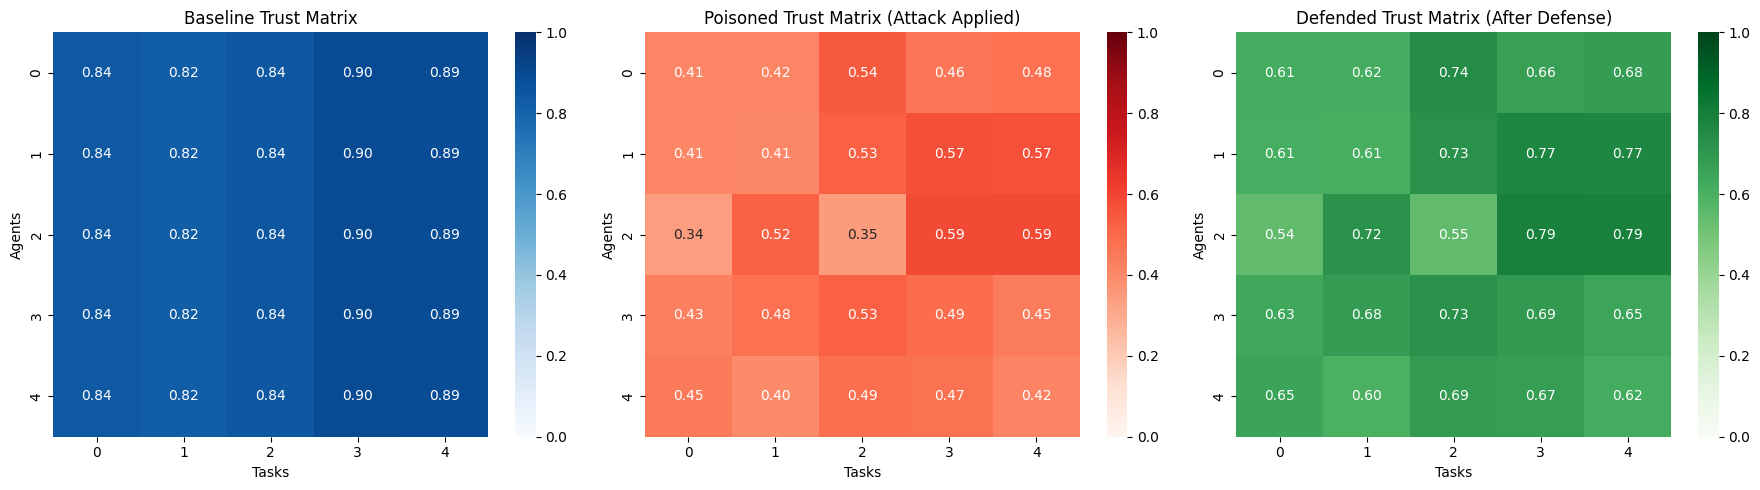

In [ ]:
plt.figure(figsize=(18,5))

# Define consistent color scale limits for fair comparison
vmin = 0
vmax = 1

# Baseline
plt.subplot(1,3,1)
sns.heatmap(trust_matrix_qubo, annot=True, fmt=".2f", cmap='Blues', cbar=True, vmin=vmin, vmax=vmax)
plt.title('Baseline Trust Matrix')
plt.xlabel('Tasks')
plt.ylabel('Agents')

# Poisoned
plt.subplot(1,3,2)
sns.heatmap(poisoned_trust_matrix_qubo, annot=True, fmt=".2f", cmap='Reds', cbar=True, vmin=vmin, vmax=vmax)
plt.title('Poisoned Trust Matrix (Attack Applied)')
plt.xlabel('Tasks')
plt.ylabel('Agents')

# Defended
plt.subplot(1,3,3)
sns.heatmap(defense_trust_matrix_qubo, annot=True, fmt=".2f", cmap='Greens', cbar=True, vmin=vmin, vmax=vmax)
plt.title('Defended Trust Matrix (After Defense)')
plt.xlabel('Tasks')
plt.ylabel('Agents')

plt.tight_layout()
plt.show()


In [ ]:
scale_factor = 20

#baseline, normalize and scale
normalized_trust_matrix_qubo = trust_matrix_qubo / np.max(trust_matrix_qubo)
trust_matrix_qubo_rescaled = normalized_trust_matrix_qubo * scale_factor

#poisoned, normalize and scale
normalized_poisoned_trust_matrix_qubo = poisoned_trust_matrix_qubo / np.max(poisoned_trust_matrix_qubo)
poisoned_trust_matrix_qubo_rescaled = normalized_poisoned_trust_matrix_qubo * scale_factor

#defended, normalize and scale
normalized_defense_trust_matrix_qubo = defense_trust_matrix_qubo / np.max(defense_trust_matrix_qubo)
defense_trust_matrix_qubo_rescaled = normalized_defense_trust_matrix_qubo * scale_factor

#select from the full fleet for comparison
baseline_trust_matrix = agent_trust_vector[:, np.newaxis] * task_difficulty_vector[np.newaxis, :]
baseline_trust_matrix_rescaled = baseline_trust_matrix * scale_factor

#baseline sample
sample_agents = np.random.choice(num_agents, 5, replace=False)
sample_tasks = np.random.choice(num_tasks, 5, replace=False)

#extract from baseline sample
baseline_trust_matrix_sampled = baseline_trust_matrix_rescaled[np.ix_(sample_agents, sample_tasks)]
poisoned_trust_matrix_sampled = poisoned_trust_matrix_qubo_rescaled
defended_trust_matrix_sampled = defense_trust_matrix_qubo_rescaled

In [ ]:
#dimensions for submatrix
num_agents_qubo = 5
num_tasks_qubo = 5

In [ ]:
#assignments that are allowed (1) or blocked (0)
static_mask = np.ones((num_agents_qubo, num_tasks_qubo))
#block agent 2 from doing task 3
static_mask[1, 2] = 0

#increased penalty -------
lambda_penalty = 50.0
encouragement = 0.5

#three scenarios

#baseline (control)
qubo_baseline = build_qubo_improved(baseline_trust_matrix_sampled, lambda_penalty, encouragement, static_mask)
sol_baseline = solve_qubo_neal(qubo_baseline)
assign_baseline = decode_solution(sol_baseline, num_agents_qubo, num_tasks_qubo)

#poisoned (trust degraded for one agent row)
qubo_poisoned = build_qubo_improved(poisoned_trust_matrix_qubo_rescaled, lambda_penalty, encouragement, static_mask)
sol_poisoned = solve_qubo_neal(qubo_poisoned)
assign_poisoned = decode_solution(sol_poisoned, num_agents_qubo, num_tasks_qubo)

#defended
qubo_defended = build_qubo_improved(defense_trust_matrix_qubo_rescaled, lambda_penalty, encouragement, static_mask)
sol_defended = solve_qubo_neal(qubo_defended)
assign_defended = decode_solution(sol_defended, num_agents_qubo, num_tasks_qubo)

In [ ]:
#showing the matrices
print("Baseline QUBO Assignment Matrix")
print(assign_baseline)

print("\n")

print("Poisoned QUBO Assignment Matrix")
print(assign_poisoned)

print("\n")

print("Defended QUBO Assignment Matrix")
print(assign_defended)

Baseline QUBO Assignment Matrix
[[1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]]


Poisoned QUBO Assignment Matrix
[[0 0 1 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 1 0 0 0]
 [1 0 0 0 0]]


Defended QUBO Assignment Matrix
[[0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [1 0 0 0 0]]


In [ ]:
#getting overall trust reward
total_trust_poisoned = np.sum(assign_poisoned * poisoned_trust_matrix_qubo_rescaled)
total_trust_defended = np.sum(assign_defended * defense_trust_matrix_qubo_rescaled)

print("Total Trust Reward (Poisoned):", total_trust_poisoned)
print("Total Trust Reward (Defended):", total_trust_defended)

Total Trust Reward (Poisoned): 89.70915596387303
Total Trust Reward (Defended): 90.29467366143601


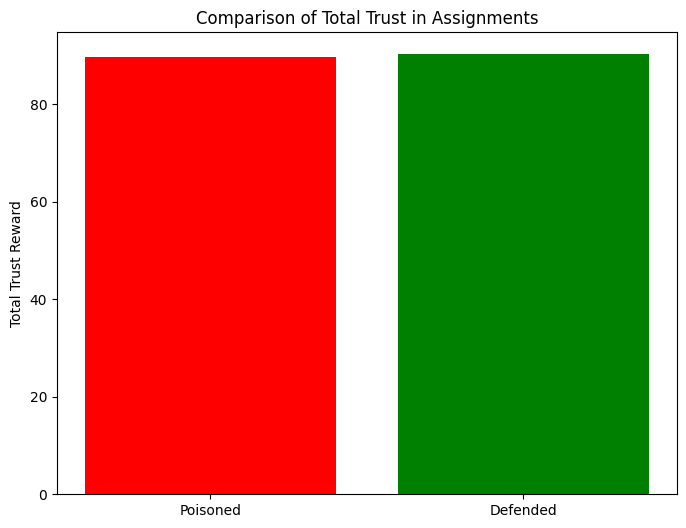

In [ ]:
#shows comparison
plt.figure(figsize=(8,6))
plt.bar(['Poisoned', 'Defended'], [total_trust_poisoned, total_trust_defended], color=['red', 'green'])
plt.ylabel('Total Trust Reward')
plt.title('Comparison of Total Trust in Assignments')
plt.show()

In [ ]:
#redefining
static_mask = np.ones((num_agents_qubo, num_tasks_qubo))
static_mask[1, 2] = 0

lambda_penalty = 50.0
encouragement = 0.5

In [ ]:
#comparing three scenarios
total_trust_baseline = np.sum(assign_baseline * baseline_trust_matrix_sampled)
total_trust_poisoned = np.sum(assign_poisoned * poisoned_trust_matrix_sampled)
total_trust_defended = np.sum(assign_defended * defended_trust_matrix_sampled)

print("\nTotal Trust Reward (Baseline):", total_trust_baseline)
print("Total Trust Reward (Poisoned):", total_trust_poisoned)
print("Total Trust Reward (Defended):", total_trust_defended)


Total Trust Reward (Baseline): 91.6871856724472
Total Trust Reward (Poisoned): 89.70915596387303
Total Trust Reward (Defended): 90.29467366143601


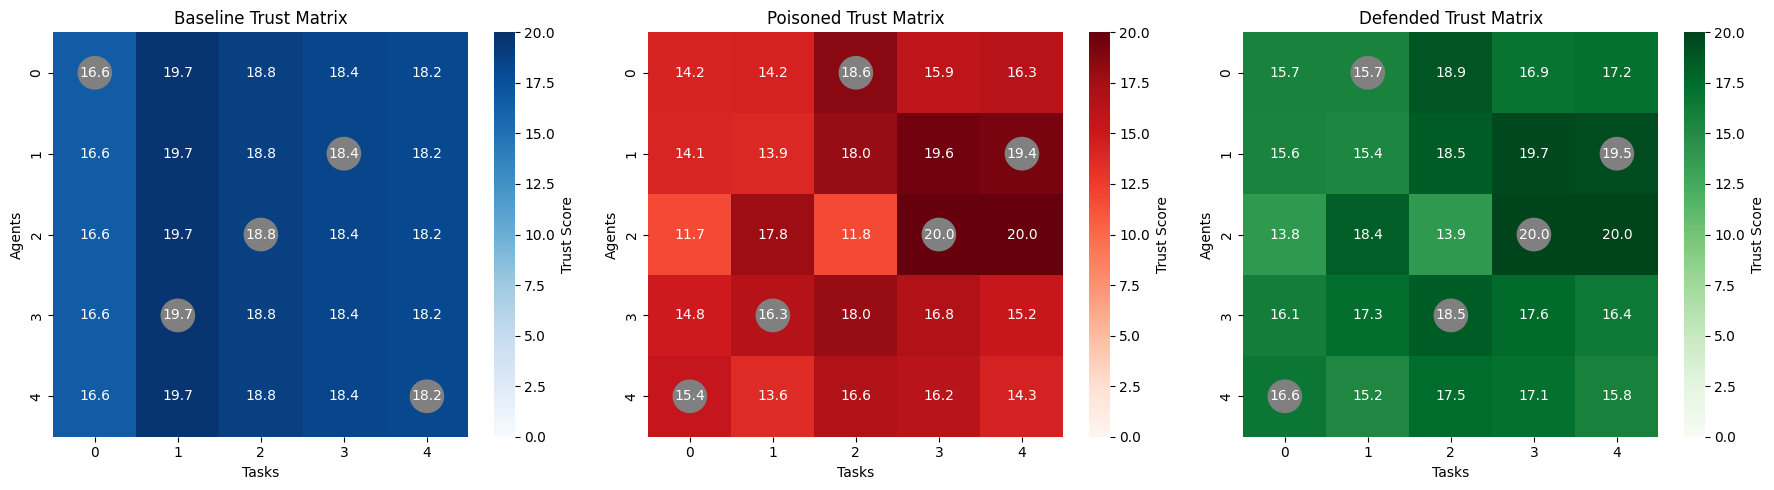

In [ ]:
#shows trust matrices with assignments marked
plt.figure(figsize=(18,5))

# Define shared color scale
vmin = 0
vmax = 20

#baseline
plt.subplot(1,3,1)
ax = sns.heatmap(baseline_trust_matrix_sampled, annot=True, fmt=".1f",
                  cmap='Blues', cbar=True, vmin=vmin, vmax=vmax)
plt.title('Baseline Trust Matrix')
plt.xlabel('Tasks')
plt.ylabel('Agents')
cbar = ax.collections[0].colorbar
cbar.set_label('Trust Score')
for i in range(assign_baseline.shape[0]):
    for j in range(assign_baseline.shape[1]):
        if assign_baseline[i, j] == 1:
            ax.add_patch(plt.Circle((j + 0.5, i + 0.5), 0.2, color='grey'))

#poisoned
plt.subplot(1,3,2)
ax = sns.heatmap(poisoned_trust_matrix_sampled, annot=True, fmt=".1f",
                  cmap='Reds', cbar=True, vmin=vmin, vmax=vmax)
plt.title('Poisoned Trust Matrix')
plt.xlabel('Tasks')
plt.ylabel('Agents')
cbar = ax.collections[0].colorbar
cbar.set_label('Trust Score')
for i in range(assign_poisoned.shape[0]):
    for j in range(assign_poisoned.shape[1]):
        if assign_poisoned[i, j] == 1:
            ax.add_patch(plt.Circle((j + 0.5, i + 0.5), 0.2, color='grey'))

#defended
plt.subplot(1,3,3)
ax = sns.heatmap(defended_trust_matrix_sampled, annot=True, fmt=".1f",
                  cmap='Greens', cbar=True, vmin=vmin, vmax=vmax)
plt.title('Defended Trust Matrix')
plt.xlabel('Tasks')
plt.ylabel('Agents')
cbar = ax.collections[0].colorbar
cbar.set_label('Trust Score')
for i in range(assign_defended.shape[0]):
    for j in range(assign_defended.shape[1]):
        if assign_defended[i, j] == 1:
            ax.add_patch(plt.Circle((j + 0.5, i + 0.5), 0.2, color='grey'))

plt.tight_layout()
plt.show()

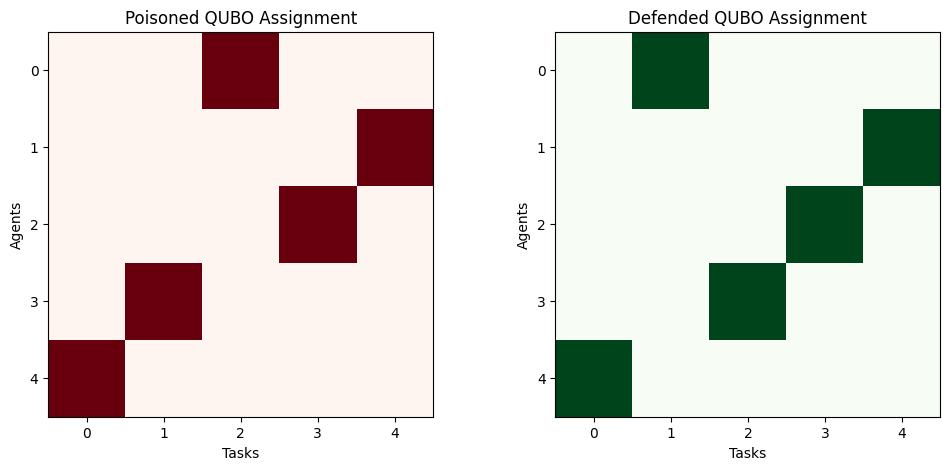

In [ ]:
#shows which cells in the assignment matrices are 1
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(assign_poisoned, cmap='Reds')
plt.title('Poisoned QUBO Assignment')
plt.xlabel('Tasks')
plt.ylabel('Agents')

plt.subplot(1,2,2)
plt.imshow(assign_defended, cmap='Greens')
plt.title('Defended QUBO Assignment')
plt.xlabel('Tasks')
plt.ylabel('Agents')
plt.show()

In [ ]:
import networkx as nx

def plot_bipartite_assignment_graph(assign_matrix, trust_matrix, title, color):
    """
    Visualizes a bipartite graph of agents and tasks.
    Edges exist only for assignment=1, with trust weights.
    """
    num_agents, num_tasks = assign_matrix.shape
    agents = [f"A{i+1}" for i in range(num_agents)]
    tasks = [f"T{j+1}" for j in range(num_tasks)]

    B = nx.Graph()
    B.add_nodes_from(agents, bipartite=0)
    B.add_nodes_from(tasks, bipartite=1)

    for i in range(num_agents):
        for j in range(num_tasks):
            if assign_matrix[i,j]==1:
                weight = round(trust_matrix[i,j],1)
                B.add_edge(agents[i], tasks[j], weight=weight)

    pos = nx.drawing.layout.bipartite_layout(B, agents)
    plt.figure(figsize=(8,6))
    edges = B.edges(data=True)
    nx.draw(B, pos, with_labels=True, node_color='lightgray', edge_color=color, width=2, node_size=1000)
    nx.draw_networkx_edge_labels(B, pos, edge_labels={(u,v):d['weight'] for u,v,d in edges})
    plt.title(title)
    plt.show()


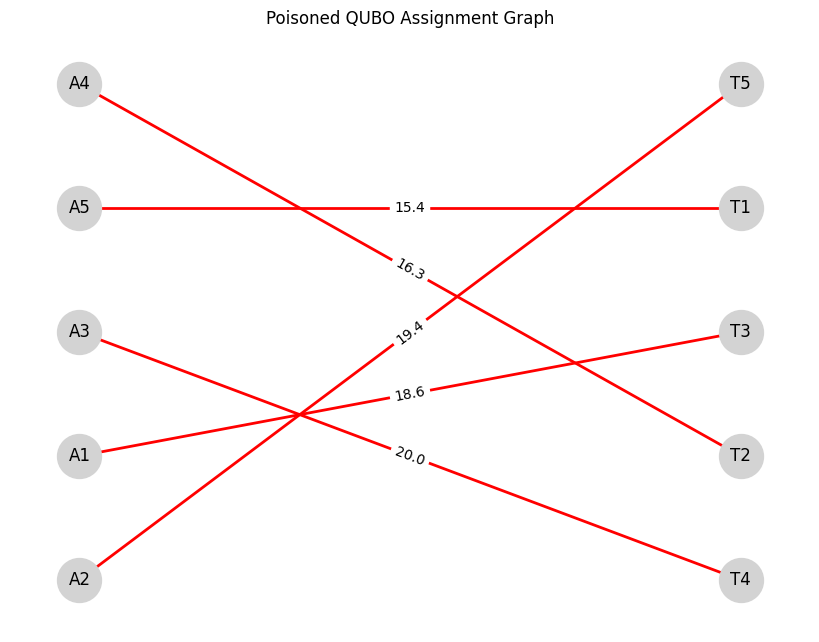

In [ ]:
plot_bipartite_assignment_graph(assign_poisoned, poisoned_trust_matrix_qubo_rescaled,
                                title="Poisoned QUBO Assignment Graph",
                                color='red')


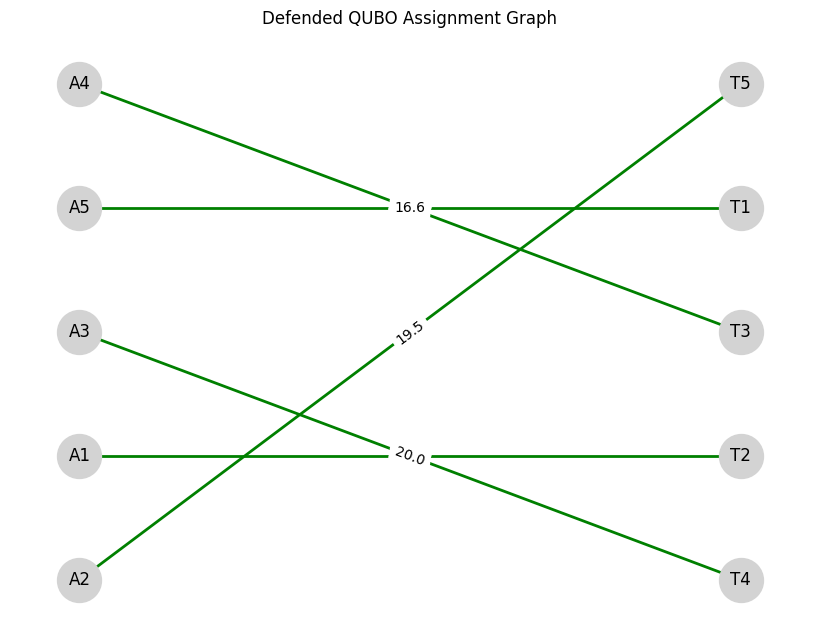

In [ ]:
plot_bipartite_assignment_graph(assign_defended, defense_trust_matrix_qubo_rescaled,
                                title="Defended QUBO Assignment Graph",
                                color='green')


In [ ]:
def plot_overlay_bipartite_assignments(assign_matrix1, trust_matrix1, label1, color1,
                                        assign_matrix2, trust_matrix2, label2, color2,
                                        title):
    """
    Overlays two assignment bipartite graphs for comparison.
    """
    num_agents, num_tasks = assign_matrix1.shape
    agents = [f"A{i+1}" for i in range(num_agents)]
    tasks = [f"T{j+1}" for j in range(num_tasks)]

    # Combined graph with both sets of edges
    B = nx.Graph()
    B.add_nodes_from(agents, bipartite=0)
    B.add_nodes_from(tasks, bipartite=1)

    pos = nx.drawing.layout.bipartite_layout(B, agents)
    plt.figure(figsize=(10,8))
    plt.title(title)

    # Edges from first assignment (e.g., poisoned)
    edges1 = []
    edge_labels1 = {}
    for i in range(num_agents):
        for j in range(num_tasks):
            if assign_matrix1[i,j]==1:
                weight = round(trust_matrix1[i,j],1)
                edges1.append((agents[i], tasks[j]))
                edge_labels1[(agents[i], tasks[j])] = f"{weight}"

    nx.draw_networkx_edges(B, pos, edgelist=edges1, edge_color=color1, width=2, label=label1, style='dashed')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels1, font_color=color1)

    # Edges from second assignment (e.g., defended)
    edges2 = []
    edge_labels2 = {}
    for i in range(num_agents):
        for j in range(num_tasks):
            if assign_matrix2[i,j]==1:
                weight = round(trust_matrix2[i,j],1)
                edges2.append((agents[i], tasks[j]))
                edge_labels2[(agents[i], tasks[j])] = f"{weight}"

    nx.draw_networkx_edges(B, pos, edgelist=edges2, edge_color=color2, width=2, label=label2, style='solid')
    nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels2, font_color=color2)

    # Draw nodes last so they are on top
    nx.draw_networkx_nodes(B, pos, node_color='lightgray', node_size=1000)
    nx.draw_networkx_labels(B, pos)

    plt.legend()
    plt.axis('off')
    plt.show()


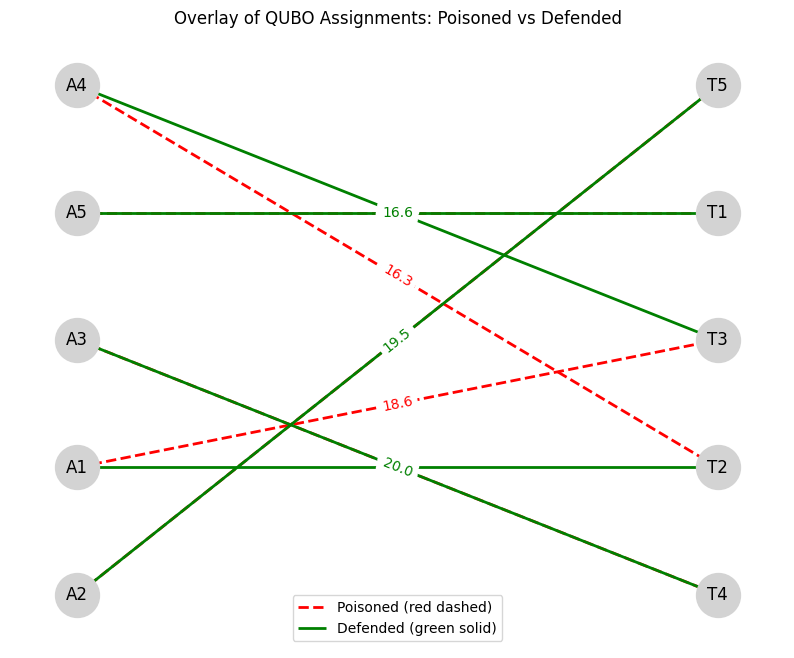

In [ ]:
plot_overlay_bipartite_assignments(
    assign_poisoned, poisoned_trust_matrix_qubo_rescaled, 'Poisoned (red dashed)', 'red',
    assign_defended, defense_trust_matrix_qubo_rescaled, 'Defended (green solid)', 'green',
    title="Overlay of QUBO Assignments: Poisoned vs Defended"
)
